In [1]:
#la meva branca --> document de treball
from fluids import *
from thermo import Mixture
from scipy.constants import atmosphere, zero_Celsius, mmHg, g
import scipy as sci

In [2]:
from uncertainties.unumpy import *
from uncertainties import *
from numpy import *
from pandas import *
import uncertainties
# For the calculation of flow rate with uncertainties:
wrappedFlowMeter = uncertainties.wrap( differential_pressure_meter_solver) 

In [3]:
# Air conditions in experimental session
P_amb = 745 # Ambient pressure in mmHg
P_amb = P_amb*mmHg # Pressure in Pa
T_amb = 25 # T in degrees
T_amb = T_amb + zero_Celsius # T in K 
air   = Mixture('air',T=T_amb,P=P_amb)
k     = air.isentropic_exponent
mu    = air.mu
rho   = air.rho

In [4]:
wrappedFlowMeter

99325.16447368421

In [5]:
# Normal conditions for air
airN = Mixture('air',T=293,P=101325)
rhoN = airN.rho

### Function definition
This functions calculates flow rate from measurement of water columns

In [6]:
def flow_meter_calculator (mesures1 , mesures2 , manRelRho, deltaH , taps , meter_type , Do , D1 , rho , k , mu  ):  
    #Experimental setup


#Inci tractament de les dades
    flow_meter_calculator           = DataFrame()
    flow_meter_calculator['h1']     = uarray(mesures1 ,DeltaH*ones(len (mesures1)))
    flow_meter_calculator['h2']     = uarray(mesures2 ,DeltaH*ones(len (mesures2)))
#ManRelRho is the relative density of the manometric fluid
    flow_meter_calculator['p1']     = flow_meter_calculator.h2 * g * manRelRho # p1 is the bigger pressure, and 
    flow_meter_calculator['p2']     = flow_meter_calculator.h1 * g * manRelRho # p2 is the low pressure in the nozzle
    flow_meter_calculator['DeltaP'] = flow_meter_calculator.p1 - flow_meter_calculator.p2

# Càlcul de cabal
    mdot_s_1 = uarray( zeros(len (mesures1)) , zeros(len (mesures1)) )

    for i,row in flow_meter_calculator.iterrows():
        if nominal_value(row.DeltaP) != 0.0:        # Just to avoid division by 0 when DeltaP=0. .
            mdot_s_1[i] = wrappedFlowMeter(D=D1, D2=Do, P1=P_amb,\
                                           P2=P_amb-row.DeltaP, rho=rho, mu=mu, \
                                           k=k, meter_type=meter_type, taps=taps)
        else:
            mdot_s_1[i] = ufloat(0.0,0.0)

    flow_meter_calculator['mdot_s'] = mdot_s_1

    flow_meter_calculator['QN_s'] = flow_meter_calculator.mdot_s*60000/rhoN
    
    return flow_meter_calculator

## This part is for the flow rate calculation in nozzle.

In this part the secondary flow, which is suctioned from the atmosphere is measured. Uncertainties and flow meter from the fluid package is used.

### For the experiments with the small nozzle 

In [7]:
#Experimental setup
taps                      = 'flange'
meter_type                = 'long radius nozzle'

Do_1                      = ufloat(5.15e-3,5e-5)          # orifice diameter in m (small nozzle)
D1                        = 4                               # pipe diameter in m
DeltaH                    = 5   # uncertainty in pressure,in mm. abans n'hi havia 2


#For the moment we do in this way. Probably we can read forma CSV file

# Entada dels valors de les lectures
mesures1                  = [411,373,331,281,221,169,124,78,15]
mesures2                  = [509,548,590,642,702,752,799,843,901]
manRelRho                 = 1   # It is water

smallNozzleData1 = flow_meter_calculator (mesures1 , mesures2 , manRelRho, DeltaH , taps , meter_type , \
                                         Do_1 , D1 , rho , k , mu  )
# smallNozzleData1

#### Now this is another experiment with lower flow rate. The manometric fluid is alcohol

In [8]:
# Entada dels valors de les lectures
mesures1                  = [249,247,213,227,220,205,153,150,90]
mesures2                  = [251,254,279,254,261,290,342,345,403]
manRelRho                 = 0.7918   # It is alcohol
smallNozzleData2 = flow_meter_calculator (mesures1 , mesures2 , manRelRho, DeltaH , taps , meter_type , \
                                         Do_1 , D1 , rho , k , mu  )
# smallNozzleData2

### For the experiments with the large nozzle


In [9]:
Do_2                      = ufloat(10.3e-3,5e-5) # orifice diameter in m (large nozzle)

# Entrada de les mesures
#mesures1                  = [226,248,282,318,330,360,391,413,437,459,466,470]
#mesures2                  = [717,694,659,624,613,582,551,529,504,484,473,470]
###        The 11th measurement seems to be wrong
mesures1                  = [226,248,282,318,330,360,391,413,437,459,470]
mesures2                  = [717,694,659,624,613,582,551,529,504,484,470]
manRelRho                 = 1 #It is water

In [10]:
largeNozzleData = flow_meter_calculator (mesures1 , mesures2 , manRelRho, DeltaH , \
                                         taps , meter_type , Do_2 , D1 , rho , k , mu  )
largeNozzleData

,h1,h2,p1,p2,DeltaP,mdot_s,QN_s
0,226+/-5,717+/-5,(7.03+/-0.05)e+03,(2.22+/-0.05)e+03,(4.82+/-0.07)e+03,0.00831+/-0.00010,414+/-5
1,248+/-5,694+/-5,(6.81+/-0.05)e+03,(2.43+/-0.05)e+03,(4.37+/-0.07)e+03,0.00794+/-0.00010,395+/-5
2,282+/-5,659+/-5,(6.46+/-0.05)e+03,(2.77+/-0.05)e+03,(3.70+/-0.07)e+03,0.00732+/-0.00010,364+/-5
3,318+/-5,624+/-5,(6.12+/-0.05)e+03,(3.12+/-0.05)e+03,(3.00+/-0.07)e+03,0.00661+/-0.00010,329+/-5
4,330+/-5,613+/-5,(6.01+/-0.05)e+03,(3.24+/-0.05)e+03,(2.78+/-0.07)e+03,0.00636+/-0.00010,316+/-5
5,360+/-5,582+/-5,(5.71+/-0.05)e+03,(3.53+/-0.05)e+03,(2.18+/-0.07)e+03,0.00564+/-0.00010,281+/-5
6,391+/-5,551+/-5,(5.40+/-0.05)e+03,(3.83+/-0.05)e+03,(1.57+/-0.07)e+03,0.00479+/-0.00012,238+/-6
7,413+/-5,529+/-5,(5.19+/-0.05)e+03,(4.05+/-0.05)e+03,(1.14+/-0.07)e+03,0.00407+/-0.00013,203+/-7
8,437+/-5,504+/-5,(4.94+/-0.05)e+03,(4.29+/-0.05)e+03,(6.6+/-0.7)e+02,0.00308+/-0.00017,154+/-8
9,459+/-5,484+/-5,(4.75+/-0.05)e+03,(4.50+/-0.05)e+03,(2.5+/-0.7)e+02,0.00186+/-0.00027,93+/-14


## Now we compute the presssure in the vessel

### For the small nozzle experiments

In [11]:
DeltaH_Hg = 2 # Measurement uncertainty for mercury
mesures1                        = [799,784,774,767,757,749,743,739,734]
mesures2                        = [227,240,252,256,268,276,281,286,290]
smallNozzleData1['h3']           = uarray( mesures1 ,DeltaH_Hg*ones(len (mesures1)))
smallNozzleData1['h4']           = uarray( mesures2 ,DeltaH_Hg*ones(len (mesures2)))
smallNozzleData1['p3']           = smallNozzleData1.h3*mmHg
smallNozzleData1['p4']           = smallNozzleData1.h4*mmHg
smallNozzleData1['P_vessel']     = smallNozzleData1.p3-smallNozzleData1.p4
smallNozzleData1['P_vessel_dim'] = (P_amb - smallNozzleData1.P_vessel)/P_amb

In [12]:
mesures1                        = [810,811,799,805,801,793,787,779,775]
mesures2                        = [218,211,221,218,221,228,236,243,248]
smallNozzleData2['h3']           = uarray( mesures1 ,DeltaH_Hg*ones(len (mesures1)))
smallNozzleData2['h4']           = uarray( mesures2 ,DeltaH_Hg*ones(len (mesures2)))
smallNozzleData2['p3']           = smallNozzleData2.h3*mmHg
smallNozzleData2['p4']           = smallNozzleData2.h4*mmHg
smallNozzleData2['P_vessel']     = smallNozzleData2.p3-smallNozzleData2.p4
smallNozzleData2['P_vessel_dim'] = (P_amb - smallNozzleData2.P_vessel)/P_amb

### For the large nozzle experiments

In [13]:
#mesures1                        = [1176,1187,1211,1233,1248,1267,1296,1334,1363,1410,1461,1463]
mesures1                        = [1176,1187,1211,1233,1248,1267,1296,1334,1363,1410,1463]
#mesures2                        = [1143,1131,1109,1087,1072,1053,1024,988,960,913,862,860]
mesures2                        = [1143,1131,1109,1087,1072,1053,1024,988,960,913,860]
largeNozzleData['h3']           = uarray(mesures1,DeltaH_Hg*ones(len (mesures1)))
largeNozzleData['h4']           = uarray(mesures2,DeltaH_Hg*ones(len (mesures2)))
largeNozzleData['p3']           = largeNozzleData.h3*mmHg
largeNozzleData['p4']           = largeNozzleData.h4*mmHg
largeNozzleData['P_vessel']     = largeNozzleData.p3-largeNozzleData.p4
largeNozzleData['P_vessel_dim'] = (P_amb - largeNozzleData.P_vessel)/P_amb

In [14]:
# smallNozzleData1

In [15]:
# smallNozzleData2

In [16]:
largeNozzleData

,h1,h2,p1,p2,DeltaP,mdot_s,QN_s,h3,h4,p3,p4,P_vessel,P_vessel_dim
0,226+/-5,717+/-5,(7.03+/-0.05)e+03,(2.22+/-0.05)e+03,(4.82+/-0.07)e+03,0.00831+/-0.00010,414+/-5,1176.0+/-2.0,1143.0+/-2.0,(1.5679+/-0.0027)e+05,(1.5239+/-0.0027)e+05,(4.4+/-0.4)e+03,0.956+/-0.004
1,248+/-5,694+/-5,(6.81+/-0.05)e+03,(2.43+/-0.05)e+03,(4.37+/-0.07)e+03,0.00794+/-0.00010,395+/-5,1187.0+/-2.0,1131.0+/-2.0,(1.5825+/-0.0027)e+05,(1.5079+/-0.0027)e+05,(7.5+/-0.4)e+03,0.925+/-0.004
2,282+/-5,659+/-5,(6.46+/-0.05)e+03,(2.77+/-0.05)e+03,(3.70+/-0.07)e+03,0.00732+/-0.00010,364+/-5,1211.0+/-2.0,1109.0+/-2.0,(1.6145+/-0.0027)e+05,(1.4785+/-0.0027)e+05,(1.36+/-0.04)e+04,0.863+/-0.004
3,318+/-5,624+/-5,(6.12+/-0.05)e+03,(3.12+/-0.05)e+03,(3.00+/-0.07)e+03,0.00661+/-0.00010,329+/-5,1233.0+/-2.0,1087.0+/-2.0,(1.6439+/-0.0027)e+05,(1.4492+/-0.0027)e+05,(1.95+/-0.04)e+04,0.804+/-0.004
4,330+/-5,613+/-5,(6.01+/-0.05)e+03,(3.24+/-0.05)e+03,(2.78+/-0.07)e+03,0.00636+/-0.00010,316+/-5,1248.0+/-2.0,1072.0+/-2.0,(1.6639+/-0.0027)e+05,(1.4292+/-0.0027)e+05,(2.35+/-0.04)e+04,0.764+/-0.004
5,360+/-5,582+/-5,(5.71+/-0.05)e+03,(3.53+/-0.05)e+03,(2.18+/-0.07)e+03,0.00564+/-0.00010,281+/-5,1267.0+/-2.0,1053.0+/-2.0,(1.6892+/-0.0027)e+05,(1.4039+/-0.0027)e+05,(2.85+/-0.04)e+04,0.713+/-0.004
6,391+/-5,551+/-5,(5.40+/-0.05)e+03,(3.83+/-0.05)e+03,(1.57+/-0.07)e+03,0.00479+/-0.00012,238+/-6,1296.0+/-2.0,1024.0+/-2.0,(1.7279+/-0.0027)e+05,(1.3652+/-0.0027)e+05,(3.63+/-0.04)e+04,0.635+/-0.004
7,413+/-5,529+/-5,(5.19+/-0.05)e+03,(4.05+/-0.05)e+03,(1.14+/-0.07)e+03,0.00407+/-0.00013,203+/-7,1334.0+/-2.0,988.0+/-2.0,(1.7785+/-0.0027)e+05,(1.3172+/-0.0027)e+05,(4.61+/-0.04)e+04,0.536+/-0.004
8,437+/-5,504+/-5,(4.94+/-0.05)e+03,(4.29+/-0.05)e+03,(6.6+/-0.7)e+02,0.00308+/-0.00017,154+/-8,1363.0+/-2.0,960.0+/-2.0,(1.8172+/-0.0027)e+05,(1.2799+/-0.0027)e+05,(5.37+/-0.04)e+04,0.459+/-0.004
9,459+/-5,484+/-5,(4.75+/-0.05)e+03,(4.50+/-0.05)e+03,(2.5+/-0.7)e+02,0.00186+/-0.00027,93+/-14,1410.0+/-2.0,913.0+/-2.0,(1.8798+/-0.0027)e+05,(1.2172+/-0.0027)e+05,(6.63+/-0.04)e+04,0.333+/-0.004


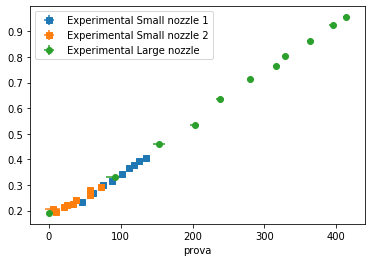

In [20]:
# %matplotlib widget

import matplotlib.pyplot as plt

fig = plt.figure()
fig1 = fig.add_subplot(1,1,1)
fig1.errorbar(x=nominal_values(smallNozzleData1.QN_s),y=nominal_values(smallNozzleData1.P_vessel_dim),\
              xerr=std_devs(smallNozzleData1.QN_s),yerr=std_devs(smallNozzleData1.P_vessel_dim),\
              fmt='s',label="Experimental Small nozzle 1")
fig1.errorbar(x=nominal_values(smallNozzleData2.QN_s),y=nominal_values(smallNozzleData2.P_vessel_dim),\
              xerr=std_devs(smallNozzleData2.QN_s),yerr=std_devs(smallNozzleData2.P_vessel_dim),\
              fmt='s',label="Experimental Small nozzle 2")
fig1.errorbar(x=nominal_values(largeNozzleData.QN_s),y=nominal_values(largeNozzleData.P_vessel_dim),\
              xerr=std_devs(largeNozzleData.QN_s),yerr=std_devs(largeNozzleData.P_vessel_dim),\
              fmt='o',label="Experimental Large nozzle")
plt.xlabel("prova")
fig1.legend()

In [46]:
#np.savetxt('mdotLABSONvsPressure.csv',np.transpose(np.vstack((nominal_values(largeNozzleData.mdot_s),nominal_values(largeNozzleData.P_vessel)))),delimiter=';')
largeNozzleData.to_csv(path_or_buf='mdotLABSONvsPressure.csv',sep=';')

## Compute of the flow of the Principle section --> consumption
We will use the same but now for the value of the comsumption flow. Also , density is function of pressure, since here air is compressed. Meter_type changes.

In [19]:
def mdot_p ( mesures1 , mesures2 , DeltaP , DeltaT , mesuresT , D1 , D2 , taps, meter_type  ):
      
    p1                = uarray( mesures1 , DeltaP * ones(len (mesures1)) )
    p2                = uarray( mesures2 , DeltaP * ones(len (mesures2)) )
    T1                = uarray( mesuresT ,  DeltaT * ones(len (mesuresT) ) )
    mdot_p            = uarray(zeros(len(mesures1)) , zeros(len(mesures1)) )
    T1                = T1 + zero_Celsius
    p1                = ( p1 + 1 ) * 1e5     # Pressió en Pa, absoluts
    p2                = ( p2 + 1 ) * 1e5

    for i in range( len(mesures1) ):
    # l'aire es calcula amb cada valor de P i de T. Per això 
        air           = Mixture( 'air' , T=float(nominal_value (T1[i]) ) , \
                                P=float( nominal_value( p1[i] ) ) )
        r             = sci.constants.R / air.MW * 1000
        k             = air.isentropic_exponent
        mu            = air.mu
        rho           = p1[i] / ( r * T1[i] )    
    
        mdot_p[i]   = wrappedFlowMeter(D=D1, D2=D2, P1=p1[i], P2=p2[i], \
                                       rho=rho, mu=mu, k=k, meter_type=meter_type, taps=taps)
    return mdot_p

In [20]:
taps       = 'flange'
meter_type = 'ISO 5167 orifice'
#meter_type = 'ISA 1932 nozzle'

#dades 1a mesura --> ecxcel (large nozzle). excel

Do_1       = ufloat(4.2e-3,1e-5)  # orifice diameter in m (small nozzle)
D1         = 22e-3                # pipe diameter in m
DeltaP     = 0.01                 # uncertainty in pressure, in bar
DeltaT     = 0.1                  # uncertainty in kelvin
#mesures1   = [6.72,6.72,6.71,6.72,6.70,6.70,6.70,6.69,6.69,6.69,6.69,6.69]
#mesures2   = [6.00,6.01,6.00,6.01,6.00,6.00,6.00,6.00,6.00,5.99,6.00,6.00]
#mesuresT         = [18.0,18.0,18.1,18.2,19.1,19.1,19.2,19.3,19.5,19.6,19.5,19.6]
###         The 11th measurement seems to be wrong
mesures1   = [6.72,6.72,6.71,6.72,6.70,6.70,6.70,6.69,6.69,6.69,6.69]
mesures2   = [6.00,6.01,6.00,6.01,6.00,6.00,6.00,6.00,6.00,5.99,6.00]
mesuresT   = [18.0,18.0,18.1,18.2,19.1,19.1,19.2,19.3,19.5,19.6,19.6]


largeNozzleData['mdot_p']   = mdot_p( mesures1 , mesures2 , DeltaP , DeltaT , \
                                     mesuresT , D1 , Do_1 , taps , meter_type )
largeNozzleData['QN_p']     = largeNozzleData.mdot_p*60000/rhoN
largeNozzleData['mu']       = largeNozzleData.QN_s/largeNozzleData.QN_p

#dades 2a mesura (small nozzle)

Do_1       = ufloat(4.2e-3,1e-5)  # orifice diameter in m (small nozzle)
D1         = 22e-3                # pipe diameter in m
DeltaP     = 0.01                 # uncertainty in pressure, in bar
DeltaT     = 0.1                  # uncertainty in kelvin
mesures1   = [6.67,6.67,6.67,6.69,6.67,6.70,6.72,6.67,6.67]
mesures2   = [6.03,6.05,6.03,6.06,6.02,6.07,6.05,6.05,6.04]
T1         = [24.5,24.6,24.6,24.7,24.8,24.9,25.0,25.1,25.0]

smallNozzleData1["mdot_p"]   = mdot_p( mesures1 , mesures2 , DeltaP , DeltaT , \
                                     T1 , D1 , Do_1 , taps , meter_type )
smallNozzleData1['QN_p'] = smallNozzleData1.mdot_p*60000/rhoN
smallNozzleData1['mu']       = smallNozzleData1.QN_s/smallNozzleData1.QN_p
#dades 3a mesura (small nozzle, fetes per mi)

Do_1       = ufloat(4.2e-3,1e-5)  # orifice diameter in m (small nozzle)
D1         = 22e-3                # pipe diameter in m
DeltaP     = 0.01                 # uncertainty in pressure, in bar
DeltaT     = 0.1                  # uncertainty in kelvin
mesures1   = [6.67,6.67,6.67,6.69,6.67,6.70,6.72,6.67,6.67]
mesures2   = [6.03,6.05,6.03,6.06,6.02,6.07,6.05,6.05,6.04]
T1         = [24.5,24.6,24.6,24.7,24.8,24.9,25.0,25.1,25]

smallNozzleData2['mdot_p']   = mdot_p( mesures1 , mesures2 , DeltaP , DeltaT , \
                                     T1 , D1 , Do_1 , taps , meter_type )
smallNozzleData2['QN_p']     = smallNozzleData2.mdot_p*60000/rhoN
smallNozzleData2['mu']       = smallNozzleData2.QN_s/smallNozzleData2.QN_p

In [21]:
largeNozzleData

,h1,h2,p1,p2,DeltaP,mdot_s,QN_s,h3,h4,p3,p4,P_vessel,P_vessel_dim,mdot_p,QN_p,mu
0,226+/-5,717+/-5,(7.03+/-0.05)e+03,(2.22+/-0.05)e+03,(4.82+/-0.07)e+03,0.00831+/-0.00010,414+/-5,1176.0+/-2.0,1143.0+/-2.0,(1.5679+/-0.0027)e+05,(1.5239+/-0.0027)e+05,(4.4+/-0.4)e+03,0.956+/-0.004,0.00952+/-0.00010,474+/-5,0.873+/-0.014
1,248+/-5,694+/-5,(6.81+/-0.05)e+03,(2.43+/-0.05)e+03,(4.37+/-0.07)e+03,0.00794+/-0.00010,395+/-5,1187.0+/-2.0,1131.0+/-2.0,(1.5825+/-0.0027)e+05,(1.5079+/-0.0027)e+05,(7.5+/-0.4)e+03,0.925+/-0.004,0.00946+/-0.00010,471+/-5,0.839+/-0.014
2,282+/-5,659+/-5,(6.46+/-0.05)e+03,(2.77+/-0.05)e+03,(3.70+/-0.07)e+03,0.00732+/-0.00010,364+/-5,1211.0+/-2.0,1109.0+/-2.0,(1.6145+/-0.0027)e+05,(1.4785+/-0.0027)e+05,(1.36+/-0.04)e+04,0.863+/-0.004,0.00945+/-0.00010,470+/-5,0.774+/-0.013
3,318+/-5,624+/-5,(6.12+/-0.05)e+03,(3.12+/-0.05)e+03,(3.00+/-0.07)e+03,0.00661+/-0.00010,329+/-5,1233.0+/-2.0,1087.0+/-2.0,(1.6439+/-0.0027)e+05,(1.4492+/-0.0027)e+05,(1.95+/-0.04)e+04,0.804+/-0.004,0.00945+/-0.00010,471+/-5,0.699+/-0.013
4,330+/-5,613+/-5,(6.01+/-0.05)e+03,(3.24+/-0.05)e+03,(2.78+/-0.07)e+03,0.00636+/-0.00010,316+/-5,1248.0+/-2.0,1072.0+/-2.0,(1.6639+/-0.0027)e+05,(1.4292+/-0.0027)e+05,(2.35+/-0.04)e+04,0.764+/-0.004,0.00936+/-0.00010,466+/-5,0.679+/-0.013
5,360+/-5,582+/-5,(5.71+/-0.05)e+03,(3.53+/-0.05)e+03,(2.18+/-0.07)e+03,0.00564+/-0.00010,281+/-5,1267.0+/-2.0,1053.0+/-2.0,(1.6892+/-0.0027)e+05,(1.4039+/-0.0027)e+05,(2.85+/-0.04)e+04,0.713+/-0.004,0.00936+/-0.00010,466+/-5,0.602+/-0.013
6,391+/-5,551+/-5,(5.40+/-0.05)e+03,(3.83+/-0.05)e+03,(1.57+/-0.07)e+03,0.00479+/-0.00012,238+/-6,1296.0+/-2.0,1024.0+/-2.0,(1.7279+/-0.0027)e+05,(1.3652+/-0.0027)e+05,(3.63+/-0.04)e+04,0.635+/-0.004,0.00936+/-0.00010,466+/-5,0.511+/-0.014
7,413+/-5,529+/-5,(5.19+/-0.05)e+03,(4.05+/-0.05)e+03,(1.14+/-0.07)e+03,0.00407+/-0.00013,203+/-7,1334.0+/-2.0,988.0+/-2.0,(1.7785+/-0.0027)e+05,(1.3172+/-0.0027)e+05,(4.61+/-0.04)e+04,0.536+/-0.004,0.00929+/-0.00010,462+/-5,0.438+/-0.015
8,437+/-5,504+/-5,(4.94+/-0.05)e+03,(4.29+/-0.05)e+03,(6.6+/-0.7)e+02,0.00308+/-0.00017,154+/-8,1363.0+/-2.0,960.0+/-2.0,(1.8172+/-0.0027)e+05,(1.2799+/-0.0027)e+05,(5.37+/-0.04)e+04,0.459+/-0.004,0.00929+/-0.00010,462+/-5,0.332+/-0.019
9,459+/-5,484+/-5,(4.75+/-0.05)e+03,(4.50+/-0.05)e+03,(2.5+/-0.7)e+02,0.00186+/-0.00027,93+/-14,1410.0+/-2.0,913.0+/-2.0,(1.8798+/-0.0027)e+05,(1.2172+/-0.0027)e+05,(6.63+/-0.04)e+04,0.333+/-0.004,0.00935+/-0.00010,465+/-5,0.199+/-0.029


In [22]:
smallNozzleData1

,h1,h2,p1,p2,DeltaP,mdot_s,QN_s,h3,h4,p3,p4,P_vessel,P_vessel_dim,mdot_p,QN_p,mu
0,411+/-5,509+/-5,(4.99+/-0.05)e+03,(4.03+/-0.05)e+03,(9.6+/-0.7)e+02,0.00092+/-0.00004,45.7+/-1.9,799.0+/-2.0,227.0+/-2.0,(1.0652+/-0.0027)e+05,(3.026+/-0.027)e+04,(7.63+/-0.04)e+04,0.232+/-0.004,0.00887+/-0.00011,442+/-5,0.103+/-0.004
1,373+/-5,548+/-5,(5.37+/-0.05)e+03,(3.66+/-0.05)e+03,(1.72+/-0.07)e+03,0.001232+/-0.000035,61.3+/-1.7,784.0+/-2.0,240.0+/-2.0,(1.0452+/-0.0027)e+05,(3.200+/-0.027)e+04,(7.25+/-0.04)e+04,0.270+/-0.004,0.00874+/-0.00011,435+/-5,0.141+/-0.004
2,331+/-5,590+/-5,(5.79+/-0.05)e+03,(3.25+/-0.05)e+03,(2.54+/-0.07)e+03,0.00150+/-0.00004,74.7+/-1.8,774.0+/-2.0,252.0+/-2.0,(1.0319+/-0.0027)e+05,(3.360+/-0.027)e+04,(6.96+/-0.04)e+04,0.299+/-0.004,0.00887+/-0.00011,442+/-5,0.169+/-0.005
3,281+/-5,642+/-5,(6.30+/-0.05)e+03,(2.76+/-0.05)e+03,(3.54+/-0.07)e+03,0.00177+/-0.00004,88.0+/-1.9,767.0+/-2.0,256.0+/-2.0,(1.0226+/-0.0027)e+05,(3.413+/-0.027)e+04,(6.81+/-0.04)e+04,0.314+/-0.004,0.00882+/-0.00011,439+/-5,0.200+/-0.005
4,221+/-5,702+/-5,(6.88+/-0.05)e+03,(2.17+/-0.05)e+03,(4.72+/-0.07)e+03,0.00203+/-0.00004,101.2+/-2.1,757.0+/-2.0,268.0+/-2.0,(1.0093+/-0.0027)e+05,(3.573+/-0.027)e+04,(6.52+/-0.04)e+04,0.344+/-0.004,0.00893+/-0.00011,445+/-5,0.228+/-0.005
5,169+/-5,752+/-5,(7.37+/-0.05)e+03,(1.66+/-0.05)e+03,(5.72+/-0.07)e+03,0.00223+/-0.00005,111.0+/-2.3,749.0+/-2.0,276.0+/-2.0,(9.986+/-0.027)e+04,(3.680+/-0.027)e+04,(6.31+/-0.04)e+04,0.365+/-0.004,0.00882+/-0.00011,439+/-5,0.253+/-0.006
6,124+/-5,799+/-5,(7.84+/-0.05)e+03,(1.22+/-0.05)e+03,(6.62+/-0.07)e+03,0.00239+/-0.00005,118.9+/-2.4,743.0+/-2.0,281.0+/-2.0,(9.906+/-0.027)e+04,(3.746+/-0.027)e+04,(6.16+/-0.04)e+04,0.380+/-0.004,0.00909+/-0.00011,453+/-5,0.263+/-0.006
7,78+/-5,843+/-5,(8.27+/-0.05)e+03,(7.6+/-0.5)e+02,(7.50+/-0.07)e+03,0.00253+/-0.00005,126.1+/-2.5,739.0+/-2.0,286.0+/-2.0,(9.853+/-0.027)e+04,(3.813+/-0.027)e+04,(6.04+/-0.04)e+04,0.392+/-0.004,0.00873+/-0.00011,435+/-5,0.290+/-0.007
8,15+/-5,901+/-5,(8.84+/-0.05)e+03,(1.5+/-0.5)e+02,(8.69+/-0.07)e+03,0.00271+/-0.00005,134.9+/-2.7,734.0+/-2.0,290.0+/-2.0,(9.786+/-0.027)e+04,(3.866+/-0.027)e+04,(5.92+/-0.04)e+04,0.404+/-0.004,0.00880+/-0.00011,438+/-5,0.308+/-0.007


In [23]:
smallNozzleData2

,h1,h2,p1,p2,DeltaP,mdot_s,QN_s,h3,h4,p3,p4,P_vessel,P_vessel_dim,mdot_p,QN_p,mu
0,249+/-5,251+/-5,(1.95+/-0.04)e+03,(1.93+/-0.04)e+03,(2+/-5)e+01,0.00010+/-0.00020,5+/-10,810.0+/-2.0,218.0+/-2.0,(1.0799+/-0.0027)e+05,(2.906+/-0.027)e+04,(7.89+/-0.04)e+04,0.205+/-0.004,0.00887+/-0.00011,442+/-5,0.012+/-0.023
1,247+/-5,254+/-5,(1.97+/-0.04)e+03,(1.92+/-0.04)e+03,(5+/-5)e+01,0.00020+/-0.00011,10+/-6,811.0+/-2.0,211.0+/-2.0,(1.0812+/-0.0027)e+05,(2.813+/-0.027)e+04,(8.00+/-0.04)e+04,0.195+/-0.004,0.00874+/-0.00011,435+/-5,0.023+/-0.013
2,213+/-5,279+/-5,(2.17+/-0.04)e+03,(1.65+/-0.04)e+03,(5.1+/-0.5)e+02,0.00066+/-0.00004,33.1+/-1.9,799.0+/-2.0,221.0+/-2.0,(1.0652+/-0.0027)e+05,(2.946+/-0.027)e+04,(7.71+/-0.04)e+04,0.224+/-0.004,0.00887+/-0.00011,442+/-5,0.075+/-0.004
3,227+/-5,254+/-5,(1.97+/-0.04)e+03,(1.76+/-0.04)e+03,(2.1+/-0.5)e+02,0.00042+/-0.00006,20.8+/-2.9,805.0+/-2.0,218.0+/-2.0,(1.0732+/-0.0027)e+05,(2.906+/-0.027)e+04,(7.83+/-0.04)e+04,0.212+/-0.004,0.00882+/-0.00011,439+/-5,0.047+/-0.007
4,220+/-5,261+/-5,(2.03+/-0.04)e+03,(1.71+/-0.04)e+03,(3.2+/-0.5)e+02,0.00052+/-0.00005,25.8+/-2.4,801.0+/-2.0,221.0+/-2.0,(1.0679+/-0.0027)e+05,(2.946+/-0.027)e+04,(7.73+/-0.04)e+04,0.221+/-0.004,0.00893+/-0.00011,445+/-5,0.058+/-0.005
5,205+/-5,290+/-5,(2.25+/-0.04)e+03,(1.59+/-0.04)e+03,(6.6+/-0.5)e+02,0.00076+/-0.00004,37.7+/-1.8,793.0+/-2.0,228.0+/-2.0,(1.0572+/-0.0027)e+05,(3.040+/-0.027)e+04,(7.53+/-0.04)e+04,0.242+/-0.004,0.00882+/-0.00011,439+/-5,0.086+/-0.004
6,153+/-5,342+/-5,(2.66+/-0.04)e+03,(1.19+/-0.04)e+03,(1.47+/-0.05)e+03,0.001138+/-0.000031,56.7+/-1.5,787.0+/-2.0,236.0+/-2.0,(1.0492+/-0.0027)e+05,(3.146+/-0.027)e+04,(7.35+/-0.04)e+04,0.260+/-0.004,0.00909+/-0.00011,453+/-5,0.125+/-0.004
7,150+/-5,345+/-5,(2.68+/-0.04)e+03,(1.16+/-0.04)e+03,(1.51+/-0.05)e+03,0.001157+/-0.000031,57.6+/-1.5,779.0+/-2.0,243.0+/-2.0,(1.0386+/-0.0027)e+05,(3.240+/-0.027)e+04,(7.15+/-0.04)e+04,0.281+/-0.004,0.00873+/-0.00011,435+/-5,0.132+/-0.004
8,90+/-5,403+/-5,(3.13+/-0.04)e+03,(7.0+/-0.4)e+02,(2.43+/-0.05)e+03,0.001467+/-0.000033,73.0+/-1.7,775.0+/-2.0,248.0+/-2.0,(1.0332+/-0.0027)e+05,(3.306+/-0.027)e+04,(7.03+/-0.04)e+04,0.293+/-0.004,0.00880+/-0.00011,438+/-5,0.167+/-0.004


## Now about numerical results with HiSA

In [24]:
#These are the total pressure in the vessel
p0_s = array([100,80,60,40,30,27.5,25,21.73])/100
#This is the calculated flow rate for variable ps
mdot_s = array([1.30,1.03,0.73,0.45,0.33,0.26,0.14,0.0])*1e-4
# which has to be multiplied by 360/5=72
mdot_s = mdot_s*72
mdot_s = uarray(mdot_s,mdot_s*0.004)
numData=DataFrame()
numData['p0_s_dim']=p0_s
numData['mdot_s']=mdot_s

In [25]:
numData['QN_s']=numData.mdot_s*60000/rhoN

In [26]:
numData

,p0_s_dim,mdot_s,QN_s
0,1.0000,0.00936+/-0.00004,466.0+/-1.9
1,0.8000,0.007416+/-0.000030,369.2+/-1.5
2,0.6000,0.005256+/-0.000021,261.7+/-1.0
3,0.4000,0.003240+/-0.000013,161.3+/-0.6
4,0.3000,0.002376+/-0.000010,118.3+/-0.5
5,0.2750,0.001872+/-0.000007,93.2+/-0.4
6,0.2500,0.001008+/-0.000004,50.18+/-0.20
7,0.2173,0.0+/-0,0.0+/-0


In [27]:
fig1.errorbar(x=nominal_values(numData.QN_s),y=nominal_values(numData.p0_s_dim),\
              xerr=std_devs(numData.QN_s),yerr=std_devs(numData.p0_s_dim),fmt='v',label="Numerical")

<ErrorbarContainer object of 3 artists>

In [28]:
fig1.legend()

In [29]:
mdot_p = array([1.315,1.314,1.314,1.314,1.314,1.314,1.314,1.314])*1e-4
# which has to be multiplied by 360/5=72
mdot_p = mdot_p*72
mdot_p = uarray(mdot_p,mdot_p*0.003)
numData['mdot_p']=mdot_p
numData['QN_p']=numData.mdot_p*60000/rhoN

In [30]:
numData['mu']=numData.QN_s/numData.QN_p

In [31]:
numData

,p0_s_dim,mdot_s,QN_s,mdot_p,QN_p,mu
0,1.0000,0.00936+/-0.00004,466.0+/-1.9,0.009468+/-0.000028,471.4+/-1.4,0.989+/-0.005
1,0.8000,0.007416+/-0.000030,369.2+/-1.5,0.009461+/-0.000028,471.0+/-1.4,0.784+/-0.004
2,0.6000,0.005256+/-0.000021,261.7+/-1.0,0.009461+/-0.000028,471.0+/-1.4,0.5556+/-0.0028
3,0.4000,0.003240+/-0.000013,161.3+/-0.6,0.009461+/-0.000028,471.0+/-1.4,0.3425+/-0.0017
4,0.3000,0.002376+/-0.000010,118.3+/-0.5,0.009461+/-0.000028,471.0+/-1.4,0.2511+/-0.0013
5,0.2750,0.001872+/-0.000007,93.2+/-0.4,0.009461+/-0.000028,471.0+/-1.4,0.1979+/-0.0010
6,0.2500,0.001008+/-0.000004,50.18+/-0.20,0.009461+/-0.000028,471.0+/-1.4,0.1065+/-0.0005
7,0.2173,0.0+/-0,0.0+/-0,0.009461+/-0.000028,471.0+/-1.4,0.0+/-0


In [46]:
mufig = plt.figure()
mufig1 = mufig.add_subplot(1,1,1)
mufig1.errorbar(x=nominal_values(smallNozzleData1.mu),y=nominal_values(smallNozzleData1.P_vessel_dim),\
              xerr=std_devs(smallNozzleData1.mu),yerr=std_devs(smallNozzleData1.P_vessel_dim),\
              fmt='s',label="Experimental Small nozzle 1")
mufig1.errorbar(x=nominal_values(smallNozzleData2.mu),y=nominal_values(smallNozzleData2.P_vessel_dim),\
              xerr=std_devs(smallNozzleData2.mu),yerr=std_devs(smallNozzleData2.P_vessel_dim),\
              fmt='s',label="Experimental Small nozzle 2")
mufig1.errorbar(x=nominal_values(largeNozzleData.mu),y=nominal_values(largeNozzleData.P_vessel_dim),\
              xerr=std_devs(largeNozzleData.mu),yerr=std_devs(largeNozzleData.P_vessel_dim),\
             fmt='o',label="Experimental Large nozzle")
mufig1.errorbar(x=nominal_values(numData.mu),y=nominal_values(numData.p0_s_dim),\
              xerr=std_devs(numData.mu),yerr=std_devs(numData.p0_s_dim),fmt='v',label="Numerical")
mufig1.legend()
mufig1.set_xlabel('$\mu$')
mufig1.set_ylabel('$P_s^*$')


FigureCanvasNbAgg()

Text(0, 0.5, '$P_s^*$')

In [47]:
mufig.savefig(fname="mu_vs_p_ast.pdf")

# Here I tried to make some fit with curves in order to obtain politropic coefficient

fitSmallNozzle =polyfit(nominal_values(smallNozzleData.mu),nominal_values(smallNozzleData.P_vessel_dim),1)
fitSmallNozzle_fn = poly1d(fitSmallNozzle)
mufig1.plot(nominal_values(smallNozzleData.mu), fitSmallNozzle_fn(nominal_values(smallNozzleData.mu)),'--k')

fitLargeNozzle =polyfit(nominal_values(largeNozzleData.mu),nominal_values(largeNozzleData.P_vessel_dim),1)
fitLargeNozzle_fn = poly1d(fitLargeNozzle)
mufig1.plot(nominal_values(largeNozzleData.mu), fitLargeNozzle_fn(nominal_values(largeNozzleData.mu)),'--k')

x = log(nominal_values(largeNozzleData.mu[:-2]))
y = log(nominal_values(largeNozzleData.P_vessel_dim[:-2]))

fitLogLarge=polyfit(x,y,1)
n,a = fitLogLarge

n,a

xf = nominal_values(largeNozzleData.mu[:-2])

yf = exp(a)*xf**n

yf

mufig1.plot(xf,yf,'--k')

nozzleData = largeNozzleData.append(smallNozzleData,ignore_index=True)

nozzleData

nozzleData = nozzleData.sort_values(by=['QN_s'])

nozzleData.reset_index(inplace=True)

nozzleData

mufig1.plot(nominal_values(nozzleData.mu),nominal_values(nozzleData.P_vessel_dim))

x = log(nominal_values(nozzleData.mu[1:]))
y = log(nominal_values(nozzleData.P_vessel_dim[1:]))

x,y

n,a = polyfit(x,y,1)

n,a

xf = nominal_values(nozzleData.mu[1:])
yf = exp(a)*xf**n

fig2 = plt.figure()

subfig2 = fig2.add_subplot(1,1,1)
subfig2.plot(xf,nominal_values(nozzleData.P_vessel_dim[1:]),'o',xf,yf)



## Now about numerical results with rhoCentralFoam

In [35]:
#These are the total pressure in the vessel
p0RCF_s = array([100,80,70,60,50,40,30,20])/100
#This is the calculated flow rate for variable ps
mdotRCF_s = array([1.21,0.94,0.81,0.69,0.56,0.44,0.35,0.18])*1e-4
# which has to be multiplied by 360/5=72
mdotRCF_s = mdotRCF_s*72
mdotRCF_s = uarray(mdotRCF_s,mdotRCF_s*0.004)
numDataRCF=DataFrame()
numDataRCF['p0_s_dim']=p0RCF_s
numDataRCF['mdot_s']=mdotRCF_s

In [36]:
numDataRCF['QN_s']=numDataRCF.mdot_s*60000/rhoN

In [40]:
numDataRCF

,p0_s_dim,mdot_s,QN_s
0,1.0,0.008712+/-0.000035,433.7+/-1.7
1,0.8,0.006768+/-0.000027,336.9+/-1.3
2,0.7,0.005832+/-0.000023,290.3+/-1.2
3,0.6,0.004968+/-0.000020,247.3+/-1.0
4,0.5,0.004032+/-0.000016,200.7+/-0.8
5,0.4,0.003168+/-0.000013,157.7+/-0.6
6,0.3,0.002520+/-0.000010,125.5+/-0.5
7,0.2,0.001296+/-0.000005,64.52+/-0.26


In [38]:
fig1.errorbar(x=nominal_values(numDataRCF.QN_s),y=nominal_values(numDataRCF.p0_s_dim),\
              xerr=std_devs(numDataRCF.QN_s),yerr=std_devs(numDataRCF.p0_s_dim),fmt='v',label="Numerical RCF")

<ErrorbarContainer object of 3 artists>

In [39]:
fig1.legend()

In [41]:
mdotRCF_p = array([1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31])*1e-4
# which has to be multiplied by 360/5=72
mdotRCF_p = mdotRCF_p*72
mdotRCF_p = uarray(mdotRCF_p,mdotRCF_p*0.003)
numDataRCF['mdot_p']=mdotRCF_p
numDataRCF['QN_p']=numDataRCF.mdot_p*60000/rhoN

In [42]:
numDataRCF['mu']=numDataRCF.QN_s/numDataRCF.QN_p

In [43]:
numDataRCF

,p0_s_dim,mdot_s,QN_s,mdot_p,QN_p,mu
0,1.0,0.008712+/-0.000035,433.7+/-1.7,0.009432+/-0.000028,469.6+/-1.4,0.924+/-0.005
1,0.8,0.006768+/-0.000027,336.9+/-1.3,0.009432+/-0.000028,469.6+/-1.4,0.718+/-0.004
2,0.7,0.005832+/-0.000023,290.3+/-1.2,0.009432+/-0.000028,469.6+/-1.4,0.6183+/-0.0031
3,0.6,0.004968+/-0.000020,247.3+/-1.0,0.009432+/-0.000028,469.6+/-1.4,0.5267+/-0.0026
4,0.5,0.004032+/-0.000016,200.7+/-0.8,0.009432+/-0.000028,469.6+/-1.4,0.4275+/-0.0021
5,0.4,0.003168+/-0.000013,157.7+/-0.6,0.009432+/-0.000028,469.6+/-1.4,0.3359+/-0.0017
6,0.3,0.002520+/-0.000010,125.5+/-0.5,0.009432+/-0.000028,469.6+/-1.4,0.2672+/-0.0013
7,0.2,0.001296+/-0.000005,64.52+/-0.26,0.009432+/-0.000028,469.6+/-1.4,0.1374+/-0.0007


In [44]:
mufig1.errorbar(x=nominal_values(numDataRCF.mu),y=nominal_values(numDataRCF.p0_s_dim),\
              xerr=std_devs(numDataRCF.mu),yerr=std_devs(numDataRCF.p0_s_dim),fmt='v',label="Numerical RCF")
mufig1.legend()
